In [1]:
import random

In [16]:
from matplotlib import pyplot as plt
%matplotlib inline

In [32]:
import numpy as np

In [243]:
X = np.empty((0,1), float)
Y = []
for i in range(1000):
    x = np.array([[random.randint(1,100)]])
    X = np.append(X, x, axis=0)
    f = 5*x[0]**2 + 17
    e = random.randint(1,8)
    Y.append(float(f + e))

X = X/np.linalg.norm(X, axis=0)
Y = map(lambda y: y/max(Y), Y)
print X[:3]
print Y[:3]

[[ 0.03367219]
 [ 0.0070603 ]
 [ 0.0130344 ]]
[0.384687656171914, 0.017331334332833584, 0.057971014492753624]


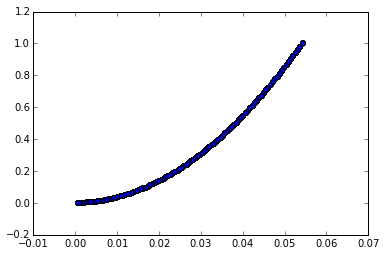

In [244]:
plt.scatter(map(lambda x: x[0], X), Y)

(18.658033792176987, -0.173017753384961)


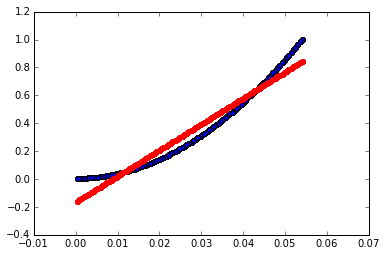

In [245]:
w1, b = np.polyfit(map(lambda x: x[0], X), Y, 1)
print (w1, b)
plt.scatter(map(lambda x: x[0], X), Y)
plt.scatter(map(lambda x: x[0], X), map(lambda x: w1*x[0]+b, X), color='red')

(array([ 18.53040149]), -0.17197220321794721)


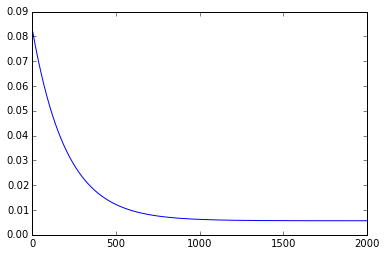

In [246]:
W = np.array([1.0])
b = 0.1
# obj = (Y[i] - Y_hat)^2 = (Y[i] - (W*X[i] + b))^2
# dobj/dw = -2*X[i]*(Y[i] - W*X[i])
# dobj/db = -2*(Y[i] - W*X[i])
learningRate = 0.005
SqErr = []
number_epoch = 2000

for j in range(number_epoch):
    Y_hat = []
    for i in range(1000):
        Y_hat.append(np.dot(X[i], W) + b)
        gradW = -2*X[i]*(Y[i] - Y_hat[i])
        gradb = -2*(Y[i] - Y_hat[i])

        W = W - learningRate * gradW
        b = b - learningRate * gradb
    SqErr.append(sum(map(lambda ((y, y_hat)): (y - y_hat)**2, zip(Y, Y_hat)))/float(1000))
    
print (W, b)
plt.plot(range(number_epoch), SqErr)

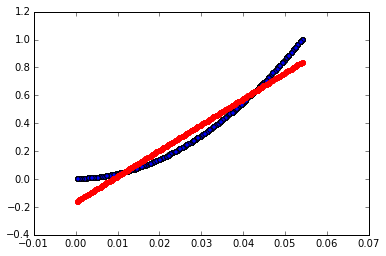

In [247]:
plt.scatter(map(lambda x: x[0], X), Y)
plt.scatter(map(lambda x: x[0], X), map(lambda x: W*x+b, X), color='red')